<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Introduction" data-toc-modified-id="Introduction-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Introduction</a></span></li><li><span><a href="#Imports" data-toc-modified-id="Imports-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Imports</a></span><ul class="toc-item"><li><span><a href="#Google-Colab" data-toc-modified-id="Google-Colab-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Google Colab</a></span></li></ul></li><li><span><a href="#Useful-Functions" data-toc-modified-id="Useful-Functions-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Useful Functions</a></span></li><li><span><a href="#Load-the-Data" data-toc-modified-id="Load-the-Data-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Load the Data</a></span></li><li><span><a href="#Class-distribution" data-toc-modified-id="Class-distribution-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Class distribution</a></span></li><li><span><a href="#Text-Preparation-for-Spacy" data-toc-modified-id="Text-Preparation-for-Spacy-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Text Preparation for Spacy</a></span></li><li><span><a href="#Named-Entity-Recognition-using-Spacy3" data-toc-modified-id="Named-Entity-Recognition-using-Spacy3-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Named Entity Recognition using Spacy3</a></span></li><li><span><a href="#NER-using-web-small" data-toc-modified-id="NER-using-web-small-8"><span class="toc-item-num">8&nbsp;&nbsp;</span>NER using web small</a></span></li><li><span><a href="#NER-Using-web-large" data-toc-modified-id="NER-Using-web-large-9"><span class="toc-item-num">9&nbsp;&nbsp;</span>NER Using web large</a></span></li><li><span><a href="#NER-using-Transformers" data-toc-modified-id="NER-using-Transformers-10"><span class="toc-item-num">10&nbsp;&nbsp;</span>NER using Transformers</a></span></li><li><span><a href="#Comparison" data-toc-modified-id="Comparison-11"><span class="toc-item-num">11&nbsp;&nbsp;</span>Comparison</a></span></li></ul></div>

<div class="alert alert-block alert-success">
<b>Kernel Author:</b>  <br>
<a href="https://bhishanpdl.github.io/" , target="_blank">Bhishan Poudel,  Data Scientist, Ph.D Astrophysics</a> .
</div>

# Introduction
[Data Description](https://www.kaggle.com/c/jigsaw-toxic-comment-classification-challenge/data)


You are provided with a large number of Wikipedia comments which have been labeled by human raters for toxic behavior. The types of toxicity are:
```
toxic
severe_toxic
obscene
threat
insult
identity_hate
```
You must create a model which predicts a probability of each type of toxicity for each comment.


References:
- https://spacy.io/usage

```python
pip install -U pip setuptools wheel
pip install -U spacy
python -m spacy download en_core_web_sm
```

# Imports

In [1]:
import time

time_start_notebook = time.time()

## Google Colab

In [2]:
%%capture
ENV_BHISHAN = True

import sys
ENV_COLAB = 'google.colab' in sys.modules

if ENV_COLAB:
    # nlp
    !python -m spacy download en_core_web_sm # nlp = spacy.load("en_core_web_sm")

    # print
    print('Environment: Google Colaboratory.')

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

pd.options.display.max_colwidth = 500

# text processing
import spacy
import en_core_web_sm

%load_ext watermark
%watermark -a "Bhishan Poudel" -d -v -m
print()
%watermark -iv

Author: Bhishan Poudel

Python implementation: CPython
Python version       : 3.7.9
IPython version      : 7.19.0

Compiler    : Clang 10.0.0 
OS          : Darwin
Release     : 19.6.0
Machine     : x86_64
Processor   : i386
CPU cores   : 4
Architecture: 64bit


numpy         : 1.19.4
matplotlib    : 3.2.2
sys           : 3.7.9 (default, Aug 31 2020, 07:22:35) 
[Clang 10.0.0 ]
seaborn       : 0.11.0
pandas        : 1.1.4
spacy         : 3.1.2
en_core_web_sm: 3.1.0



In [4]:
# my local library
import sys, os
sys.path.append(os.path.expanduser("~/Dropbox/a00_Bhishan_Modules/bhishan"))
import bhishan
from bhishan import bp

# Useful Functions

In [5]:
def show_ents(doc):
    columns=['text','start','end','label','desc']
    data = []
    if doc.ents:
        for ent in doc.ents:
            row = [ent.text,ent.start_char,ent.end_char,\
                                  ent.label_,spacy.explain(ent.label_)]
            data.append(row)
    else:
        print("No named entities found.")
    return pd.DataFrame(data,columns=columns)

# Load the Data

In [6]:
!ls /Volumes/Media/github/Datasets/Projects/Jigsaw_Toxic_Comment_Classification/

README.md            sample.csv           train.csv.zip
jigsaw_toxic.csv.zip test.csv.zip


In [7]:
h = ""
if ENV_BHISHAN:
    h = "/Volumes/Media/github/Datasets/Projects/Jigsaw_Toxic_Comment_Classification/"

ifile_train = h + 'train.csv.zip'



df_train = pd.read_csv(ifile_train,compression='zip',nrows=10)


print(df_train.shape)
df_train.head()

(10, 8)


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate
0,8d603d50affa1126,"""\nYes, aside, thank you for trying to answer the block-related concerns. I will accept your stated goal, """"to answer your questions, to help clear up points of confusion"""", as answer to my #1 above and my italicized rephrasal (i.e., the negotiation of our communicative relationship). I only ask that if you should for any reason decide to assume bad faith with me, please have the courtesy of quoting (not linking) a significant clause or sentence (not title) of a policy. Thank you. I also acc...",0,0,0,0,0,0
1,8fb3576937b9e0d0,"March 2010 (UTC)\n\nThanks! and understood about the Wproject tags. Any advice on how to better the format of the references? I am not quite au fait with this although I have done some referencing in the past. Can you beautify them or advise me? (talk) 23:43, 24",0,0,0,0,0,0
2,379440e04fb68e27,"""\n\n The Outfield \n\nHahaha - compassion is vested considering the er...kind endowment by Kylu emblazoning your page my friend. I will recommend a few songs and two albums; Play Deep and Rockeye being the latter. Both are fairly accomplished works and prove quite fresh even today: Songs wise I can certainly recommend """"Your Love"""", """"Say It isn't so"""", also """"Winning it all"""", """"Closer to me"""" with """"Tonight your mine"""". Also - welcome to Wikipedia! We do not get many persons from Cuba her...",0,0,0,0,0,0
3,6be4446aac8ae028,Opposition is a source of strength. I believe al-Sistani said that...,0,0,0,0,0,0
4,1a2ff7ed958506a3,"Please discontinue making those unsupported changes to the T line and the subway car rosters. All you will accomplish is seeing your chagges reveretd back to the previous correct version.\n\nIf you have confirmable doucmentation, supply it.",0,0,0,0,0,0


In [8]:
df_train['clean'] = df_train.loc[:,'toxic':'identity_hate'].sum(axis=1) == 0

print(df_train['clean'].sum())

df_train.head(2)

9


,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean
0,8d603d50affa1126,"""\nYes, aside, thank you for trying to answer the block-related concerns. I will accept your stated goal, """"to answer your questions, to help clear up points of confusion"""", as answer to my #1 above and my italicized rephrasal (i.e., the negotiation of our communicative relationship). I only ask that if you should for any reason decide to assume bad faith with me, please have the courtesy of quoting (not linking) a significant clause or sentence (not title) of a policy. Thank you. I also acc...",0,0,0,0,0,0,True
1,8fb3576937b9e0d0,"March 2010 (UTC)\n\nThanks! and understood about the Wproject tags. Any advice on how to better the format of the references? I am not quite au fait with this although I have done some referencing in the past. Can you beautify them or advise me? (talk) 23:43, 24",0,0,0,0,0,0,True


# Class distribution

In [9]:
ser_sum = df_train.iloc[:,2:].sum(axis=0)
ser_sum

toxic            0
severe_toxic     0
obscene          0
threat           0
insult           0
identity_hate    1
clean            9
dtype: int64

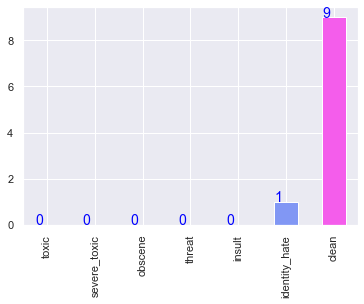

In [10]:
ax = ser_sum.sort_values().plot.bar(color=sns.color_palette('husl',len(ser_sum)))

for p in ax.patches:
    x,y = p.get_x(), p.get_height()
    ax.text(x,y,f'{y:,.0f}',fontsize=14,color='blue')

# Text Preparation for Spacy

In [11]:
df_train['text'] = df_train['comment_text'].apply(lambda x: x.replace('\n', ' '))

# Named Entity Recognition using Spacy3

In [12]:
import spacy
import en_core_web_sm

In [13]:
bp.show_methods(spacy,5)

,0,1,2,3,4
0,Config,displacy,lexeme,pipeline,strings
1,Errors,errors,load,prefer_gpu,symbols
2,Language,explain,logger,registry,tokenizer
3,Vocab,git_info,lookups,require_cpu,tokens
4,about,glossary,matcher,require_gpu,training
5,attrs,info,ml,schemas,util
6,blank,kb,morphology,scorer,vectors
7,cli,lang,parts_of_speech,setup_default_warnings,vocab
8,compat,language,pipe_analysis,,


In [14]:
from spacy import displacy

In [15]:
bp.show_methods(displacy,3)

,0,1,2
0,DependencyRenderer,Warnings,parse_ents
1,Doc,app,render
2,EntityRenderer,get_doc_settings,serve
3,Errors,is_in_jupyter,set_render_wrapper
4,RENDER_WRAPPER,parse_deps,templates
5,Span,,


In [16]:
df_train.head(1)

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,clean,text
0,8d603d50affa1126,"""\nYes, aside, thank you for trying to answer the block-related concerns. I will accept your stated goal, """"to answer your questions, to help clear up points of confusion"""", as answer to my #1 above and my italicized rephrasal (i.e., the negotiation of our communicative relationship). I only ask that if you should for any reason decide to assume bad faith with me, please have the courtesy of quoting (not linking) a significant clause or sentence (not title) of a policy. Thank you. I also acc...",0,0,0,0,0,0,True,""" Yes, aside, thank you for trying to answer the block-related concerns. I will accept your stated goal, """"to answer your questions, to help clear up points of confusion"""", as answer to my #1 above and my italicized rephrasal (i.e., the negotiation of our communicative relationship). I only ask that if you should for any reason decide to assume bad faith with me, please have the courtesy of quoting (not linking) a significant clause or sentence (not title) of a policy. Thank you. I also acce..."


In [36]:
text_all = ' '.join(list(df_train['text']))

In [17]:
text = df_train['text'].iloc[0]

print(text)

" Yes, aside, thank you for trying to answer the block-related concerns. I will accept your stated goal, ""to answer your questions, to help clear up points of confusion"", as answer to my #1 above and my italicized rephrasal (i.e., the negotiation of our communicative relationship). I only ask that if you should for any reason decide to assume bad faith with me, please have the courtesy of quoting (not linking) a significant clause or sentence (not title) of a policy. Thank you. I also accepted your answer to my #2 as ""the degree of disruption that the article can bring"", etc. (reasons you oppose existence of an article on this fundraising method). Here are the next policy questions I need answered, I'm not ready to focus on block policy yet. 3 (rephrased). WP:D says, ""Ask yourself: When a reader enters a given term in the Wikipedia search box and pushes ""Go"", what article would they most likely be expecting to view as a result?"" Why do you believe most users who type in ""money

In [18]:
help(displacy.render)

Help on function render in module spacy.displacy:

render(docs: Union[Iterable[Union[spacy.tokens.doc.Doc, spacy.tokens.span.Span]], spacy.tokens.doc.Doc, spacy.tokens.span.Span], style: str = 'dep', page: bool = False, minify: bool = False, jupyter: Union[bool, NoneType] = None, options: Dict[str, Any] = {}, manual: bool = False) -> str
    Render displaCy visualisation.
    
    docs (Union[Iterable[Doc], Doc]): Document(s) to visualise.
    style (str): Visualisation style, 'dep' or 'ent'.
    page (bool): Render markup as full HTML page.
    minify (bool): Minify HTML markup.
    jupyter (bool): Override Jupyter auto-detection.
    options (dict): Visualiser-specific options, e.g. colors.
    manual (bool): Don't parse `Doc` and instead expect a dict/list of dicts.
    RETURNS (str): Rendered HTML markup.
    
    DOCS: https://spacy.io/api/top-level#displacy.render
    USAGE: https://spacy.io/usage/visualizers



# NER using web small

In [28]:
nlp = spacy.load("en_core_web_sm")
doc = nlp(text)
# displacy.serve(doc, style="ent") # use displacy.serve when working on terminal

df_sm = show_ents(doc)

displacy.render(doc, style="ent") # use displacy.render when working on jupyter

In [20]:
bp.show_methods(nlp,5)

,0,1,2,3,4
0,Defaults,default_config,from_disk,meta,replace_pipe
1,add_pipe,default_error_handler,get_factory_meta,path,resume_training
2,analyze_pipes,disable_pipe,get_factory_name,pipe,select_pipes
3,batch_size,disable_pipes,get_pipe,pipe_factories,set_error_handler
4,begin_training,disabled,get_pipe_config,pipe_labels,set_factory_meta
5,component,enable_pipe,get_pipe_meta,pipe_names,to_bytes
6,component_names,evaluate,has_factory,pipeline,to_disk
7,components,factories,has_pipe,rehearse,tokenizer
8,config,factory,initialize,remove_pipe,update
9,create_optimizer,factory_names,lang,rename_pipe,use_params


In [21]:
bp.show_methods(doc,5)

,0,1,2,3,4
0,cats,from_docs,is_tagged,set_ents,to_disk
1,char_span,get_extension,lang,set_extension,to_json
2,copy,get_lca_matrix,lang_,similarity,to_utf8_array
3,count_by,has_annotation,mem,spans,user_data
4,doc,has_extension,noun_chunks,tensor,user_hooks
5,ents,has_unknown_spaces,noun_chunks_iterator,text,user_span_hooks
6,extend_tensor,has_vector,remove_extension,text_with_ws,user_token_hooks
7,from_array,is_nered,retokenize,to_array,vector
8,from_bytes,is_parsed,sentiment,to_bytes,vector_norm
9,from_dict,is_sentenced,sents,to_dict,vocab


In [22]:
doc.ents

(2, 3, WP, Wikipedia, 4, WP, RUBBISH, WP, CRYSTAL)

In [23]:
show_ents(doc)

,text,start,end,label,desc
0,2,520,521,MONEY,"Monetary values, including unit"
1,3,756,757,CARDINAL,Numerals that do not fall under another type
2,WP,771,773,ORG,"Companies, agencies, institutions, etc."
3,Wikipedia,839,848,ORG,"Companies, agencies, institutions, etc."
4,4,1124,1125,CARDINAL,Numerals that do not fall under another type
5,WP,1127,1129,ORG,"Companies, agencies, institutions, etc."
6,RUBBISH,1130,1137,ORG,"Companies, agencies, institutions, etc."
7,WP,1249,1251,PRODUCT,"Objects, vehicles, foods, etc. (not services)"
8,CRYSTAL,1252,1259,ORG,"Companies, agencies, institutions, etc."


# NER Using web large

In [24]:
# !/Users/poudel/opt/miniconda3/envs/nlp/bin/python -m spacy download en_core_web_lg

In [29]:
nlp = spacy.load("en_core_web_lg")
doc = nlp(text)
displacy.render(doc, style="ent")

df_lg = show_ents(doc)

# NER using Transformers

In [26]:
# !/Users/poudel/opt/miniconda3/envs/nlp/bin/python -m spacy download en_core_web_trf

In [30]:
nlp = spacy.load("en_core_web_trf")
doc = nlp(text)
displacy.render(doc, style="ent")

df_trf = show_ents(doc)

# Comparison

In [31]:
df_sm

,text,start,end,label,desc
0,2,520,521,MONEY,"Monetary values, including unit"
1,3,756,757,CARDINAL,Numerals that do not fall under another type
2,WP,771,773,ORG,"Companies, agencies, institutions, etc."
3,Wikipedia,839,848,ORG,"Companies, agencies, institutions, etc."
4,4,1124,1125,CARDINAL,Numerals that do not fall under another type
5,WP,1127,1129,ORG,"Companies, agencies, institutions, etc."
6,RUBBISH,1130,1137,ORG,"Companies, agencies, institutions, etc."
7,WP,1249,1251,PRODUCT,"Objects, vehicles, foods, etc. (not services)"
8,CRYSTAL,1252,1259,ORG,"Companies, agencies, institutions, etc."


In [32]:
df_trf

,text,start,end,label,desc
0,1,190,191,CARDINAL,Numerals that do not fall under another type
1,2,520,521,CARDINAL,Numerals that do not fall under another type
2,3,756,757,CARDINAL,Numerals that do not fall under another type
3,Wikipedia,839,848,ORG,"Companies, agencies, institutions, etc."
4,WP:SOAP,1577,1584,LAW,Named documents made into laws.


In [37]:
from IPython.display import display_html
from itertools import chain,cycle
def display_side_by_side(*args,titles=cycle([''])):
    html_str=''
    for df,title in zip(args, chain(titles,cycle(['</br>'])) ):
        html_str+='<th style="text-align:center"><td style="vertical-align:top">'
        html_str+=f'<h2>{title}</h2>'
        html_str+=df.to_html().replace('table','table style="display:inline"')
        html_str+='</td></th>'
    display_html(html_str,raw=True)

In [38]:
display_side_by_side(df_sm,df_trf)

,text,start,end,label,desc
0,2,520,521,MONEY,"Monetary values, including unit"
1,3,756,757,CARDINAL,Numerals that do not fall under another type
2,WP,771,773,ORG,"Companies, agencies, institutions, etc."
3,Wikipedia,839,848,ORG,"Companies, agencies, institutions, etc."
4,4,1124,1125,CARDINAL,Numerals that do not fall under another type
5,WP,1127,1129,ORG,"Companies, agencies, institutions, etc."
6,RUBBISH,1130,1137,ORG,"Companies, agencies, institutions, etc."
7,WP,1249,1251,PRODUCT,"Objects, vehicles, foods, etc. (not services)"
8,CRYSTAL,1252,1259,ORG,"Companies, agencies, institutions, etc."
,text,start,end,label,desc


In [45]:
from IPython.display import HTML

display(HTML(displacy.render(doc,jupyter=False)))